In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
import os
DWpath = os.path.join('..','DW')
anagrafica = pd.read_csv(os.path.join(DWpath,'anagraficaVacciniSummaryLatest.csv'))

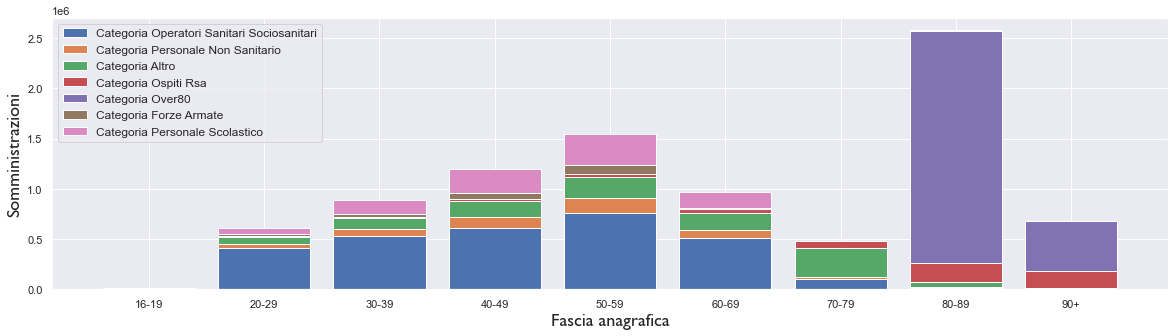

In [64]:
plt.figure(figsize=(20,5))
bottom = np.zeros(len(anagrafica['Fascia Anagrafica']))
for i in range(4,11):
    plt.bar(x=anagrafica['Fascia Anagrafica'], 
            height=anagrafica.iloc[:,i], 
            label=anagrafica.columns[i], 
            bottom=bottom,
           )
    bottom=bottom+anagrafica.iloc[:,i]

plt.xlabel('Fascia anagrafica', fontfamily='Gill Sans', fontsize=18)
plt.ylabel('Somministrazioni', fontfamily='Gill Sans', fontsize=18)
plt.legend(fontsize=12)

In [25]:
anagrafica = anagrafica.drop(columns='Unnamed: 0')

In [26]:
anagrafica

,Fascia Anagrafica,Totale,Sesso Maschile,Sesso Femminile,Categoria Operatori Sanitari Sociosanitari,Categoria Personale Non Sanitario,Categoria Altro,Categoria Ospiti Rsa,Categoria Over80,Categoria Forze Armate,Categoria Personale Scolastico,Prima Dose,Seconda Dose,% Seconda Dose Sul Totale,Platea,% Seconda Dose Assoluta,% Totale Assoluto
0,16-19,9797,4730,5067,4171,686,3480,1272,0,62,126,6758,3039,31.02,2298846,0.13,0.43
1,20-29,614252,219137,395115,412694,41336,68444,10485,0,18964,62329,386852,227400,37.02,6084382,3.74,10.10
2,30-39,889830,348404,541426,527482,69504,108632,13196,0,35020,135996,584457,305373,34.32,6854632,4.45,12.98
3,40-49,1198031,420510,777521,610498,108562,159722,19705,0,64684,234860,822539,375492,31.34,8937229,4.20,13.40
4,50-59,1546955,552399,994556,755865,155341,209667,32203,0,87234,306645,1057543,489412,31.64,9414195,5.20,16.43
5,60-69,966599,456741,509858,511809,76749,167614,38654,0,12550,159223,648989,317610,32.86,7364364,4.31,13.13
6,70-79,480330,268061,212269,103605,15564,288468,69808,0,121,2764,382614,97716,20.34,5968373,1.64,8.05
7,80-89,2577771,1103064,1474707,14698,6802,49259,190818,2315615,336,243,1780063,797708,30.95,3628160,21.99,71.05
8,90+,676217,208070,468147,3047,2207,11652,161096,498094,81,40,439898,236319,34.95,613523,38.52,110.22


In [10]:
import datetime
with open('lastupdate', 'r') as fin:
    lastupdate = fin.read().strip().split('/')
    lastupdate = datetime.date(day=int(lastupdate[2]), month=int(lastupdate[1]), year=int(lastupdate[0]))
    
lastupdate

datetime.date(2021, 3, 31)

In [11]:
lastupdate > datetime.date.today()

False